In [ ]:
# !wget -nv http://astropedia.astrogeology.usgs.gov/download/Moon/Research/Craters/lunar_crater_database_robbins_2018
# !unzip lunar_crater_database_robbins_2018
# !wget -nv https://www.dropbox.com/s/x4jro8xc6jm7id1/Catalog_Moon_Release_20180815_1kmMinus_ElliScreened.csv.zip
!unzip Catalog_Moon_Release_20180815_1kmMinus_ElliScreened.csv.zip
y

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# cc = pd.read_csv('lunar_crater_database_robbins_2018_bundle/data/lunar_crater_database_robbins_2018.csv',usecols=[1,2,5], names=['Lat','Lon','Diam_km'], header=0)
cc2 = pd.read_csv('Catalog_Moon_Release_20180815_1kmMinus_ElliScreened.csv',usecols=[1,2,5], names=['Lat','Lon','Diam_km'], header=0)

In [5]:
!rm -r lunar_crater*
!rm -r Catalog_Moon_Release*
cc=pd.read_csv('RobbinsLunarCraters.csv',index_col=0)

rm: cannot remove 'lunar_crater*': No such file or directory
rm: cannot remove 'Catalog_Moon_Release*': No such file or directory


In [6]:
print(cc.tail())
print(cc2.tail())
print(cc.describe())
print(cc2.describe())

             Lat       Lon   Diam_km
1296791 -65.6258 -156.5000   5.93636
1296792 -60.0296  178.7090   7.82310
1296793 -66.7921 -140.6210  11.55320
1296794 -79.8374   62.1794   7.16411
1296795 -79.6855   61.9220   8.81959
            Lat      Lon   Diam_km
721829 -63.1397  182.793  0.917729
721830 -63.8271  310.129  0.878883
721831 -63.7629  310.362  0.438354
721832 -63.6791  303.963  0.845526
721833 -63.6838  304.015  0.814965
                Lat           Lon       Diam_km
count  1.296796e+06  1.296796e+06  1.296796e+06
mean  -1.317424e+00  1.119930e+01  2.436963e+00
std    4.356372e+01  1.099583e+02  5.519133e+00
min   -8.984790e+01 -1.799990e+02  1.000000e+00
25%   -3.703373e+01 -9.226525e+01  1.242710e+00
50%   -3.664890e+00  2.494825e+01  1.606840e+00
75%    3.326443e+01  1.090320e+02  2.380860e+00
max    8.997350e+01  1.800000e+02  2.491870e+03
                 Lat            Lon        Diam_km
count  721834.000000  721834.000000  721834.000000
mean        5.502075     169.19668

In [ ]:
ls

In [7]:
# lon is between 0 and 360, lets make it compatible with the other catalogs: 
cc2.loc[cc2.Lon>180,'Lon']-=360
cc2.describe()

,Lat,Lon,Diam_km
count,721834.000000,721834.000000,721834.000000
mean,5.502075,-0.913011,0.715091
std,42.100268,87.732349,0.211020
min,-89.859300,-179.995000,0.029861
25%,-23.622725,-65.764750,0.583253
50%,12.204550,6.247300,0.767178
75%,30.797175,59.207175,0.885261
max,89.987300,180.000000,0.999998


In [8]:
cc=pd.concat([cc,cc2])
cc.describe()

,Lat,Lon,Diam_km
count,2.018630e+06,2.018630e+06,2.018630e+06
mean,1.121134e+00,6.868105e+00,1.821246e+00
std,4.317002e+01,1.027295e+02,4.501717e+00
min,-8.985930e+01,-1.799990e+02,2.986060e-02
25%,-3.222400e+01,-8.185000e+01,8.621052e-01
50%,1.657610e+00,1.529025e+01,1.211080e+00
75%,3.216360e+01,9.234518e+01,1.859220e+00
max,8.998730e+01,1.800000e+02,2.491870e+03


In [9]:
cc.to_csv('RobbinsLunarCraters.csv')

142598
1876032


(0.01, 1)

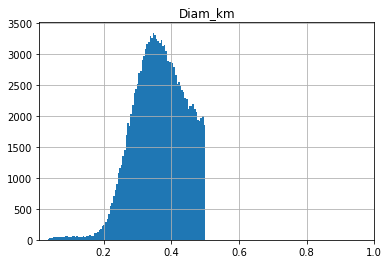

In [32]:
cc_small = cc[cc.Diam_km<=0.5]
print(len(cc_small))
cc_large = cc[cc.Diam_km>0.5]
print(len(cc_large))
%matplotlib inline
ax1 = cc_small.hist('Diam_km', bins=100)
plt.xlim(0.01, 1)

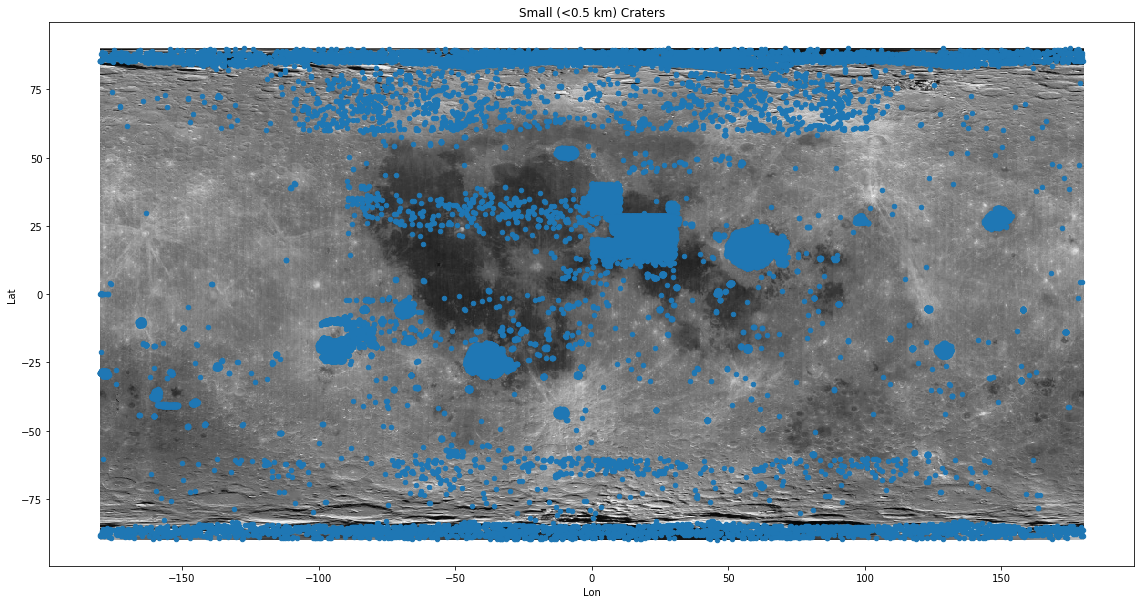

In [33]:
from PIL import Image
import numpy as np
# from matplotlib.patches import Circle
data_path = '../../data/'
albedo = Image.open(data_path + "/Clementine_albedo_simp750.jpg")

fig = plt.figure(figsize=[20, 10])
ax1 = plt.subplot(1,1,1)
al_map = plt.imshow(albedo, extent=[-180, 180, -90, 90], aspect="equal", cmap="Greys_r")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.title('Small (<0.5 km) Craters')
# for index, row in cc_small.iterrows():
#     crater = plt.Circle((row.Lon,row.Lat),row.Diam_km/30*np.cos(row.Lat*np.pi/180), fill=False)
#     ax1.add_artist(crater)
cc_small.plot('Lon','Lat', kind='scatter', ax=ax1)


In [ ]:
Head_cat = pd.read_csv('HeadCraters.csv')
Head_cat.describe()

In [ ]:
Lroc_cat = pd.read_csv('LROCCraters.csv')
Lroc_cat.describe()